# Shallow Water Gravity Waves
EAS 4610<br>
Miriam Blaine<br>
Eric Mei

## Introduction
Coastal zones comprise only a small part of Earth’s land mass but are rich in natural resources, leading to their high population densities and considerable commercial and industrial activity. To ensure the proper management of these resources, it is critical to understand and predict the processes leading to coastal change. One such process is ocean waves at the shoreline, largely produced by wind, which can be simply approximated as shallow water gravity waves. More comprehensive modeling via spectral wave models can incorporate wave-wave interactions, shoaling, wave breaking, and bottom friction. To predict coastal change more accurately, modeling systems coupling atmospheric models, ocean models, and wave models have been developed. Such models employ advanced numerical analysis techniques, including higher order finite differencing, mesh grid refinement, and data assimilation, to solve coupled models (Warner et al., 2010). The objective of this study is to model perturbations in shoreline water height as shallow water gravity waves for constant and space-varying equilibrium height. Low- and high-order numerical methods are implemented and compared with literature to assess result accuracy.

## Equations
Equations describing shallow-water gravity waves can be described by Holton (2004) with one-dimensional momentum and continuity equations $(7.17)$ and $(7.19)$:

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + w\frac{\partial u}{\partial z} = -\frac{g \delta \rho}{\rho_1} \frac{\partial h}{\partial x} \tag{7.17}$$
$$\frac{\partial h}{\partial t} + \frac{\partial}{\partial x}(hu) = 0 \tag{7.19}$$

Where $u$ is the zonal velocity in the x-direction and $h$ is the depth of water. <br>
To simplify the analysis, $u$ and $h$ are expressed in the perturbation forms:
$$u = \bar{u} + u^{\prime},\, h = H + h^{\prime}$$
$\bar{u}$ is the mean zonal velocity, $u'$ is the local velocity, $H$ is the equilibrium ocean depth, and $h'$ is the wave height. In this decomposition, $\bar{u} = 0, H \gg |h^{\prime}|$, and $u'$ is very small. Additionally, it is assumed that $H$ varies only in the space dimension. $u^{\prime}$ and $h^{\prime}$ vary with space and time. <br>

For simplicity, partial differentials may be referenced with the following notation henceforth:

$$\frac{\partial u^{\prime}}{\partial t} = u_t', \frac{\partial^2 u^{\prime}}{\partial t^2} = u_{tt}^{\prime}, etc.$$

Substituting the perturbation forms into $(7.17)$,

$$\frac{\partial u^{\prime}}{\partial t} + g(\frac{\partial H}{\partial x} + \frac{\partial h^{\prime}}{\partial x}) = u_t +  g(H_x + h_x^{\prime}) = 0 \tag{1}$$

Likewise, substituting the perturbation forms into $(7.19)$,

$$\frac{\partial}{\partial x}(hu) = H\frac{\partial \bar{u}}{\partial x} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + u^{\prime}\frac{\partial H}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} + h^{\prime} \frac{\partial \bar{u}}{\partial x} = H \frac{\partial u^{\prime}}{\partial x} $$
$$\frac{\partial h^{\prime}}{\partial t} + \bar{u} \frac{\partial H}{\partial x} + H \frac{\partial u^{\prime}}{\partial x} + \bar{u} \frac{\partial h^{\prime}}{\partial x} = h_t^{\prime} + Hu_x^{\prime} = 0 \tag{2}$$

To eliminate the $u'$ terms, $(1)$ is differentiated with $x$:

$$u_{xt}^{\prime} + g(H_{xx} + h_{xx}^{\prime}) = 0 \tag{3}$$


$(2)$ is differentiated with $t$ to isolate $u_{xt}'$:

$$h_{tt}^{\prime} + Hu_{xt}^{\prime} = 0$$
$$u_{xt}^{\prime} = -\frac{1}{H}(h_{tt}^{\prime}) \tag{4}$$

$(4)$ is substituted into $(3)$:

$$h_{tt}' - gH(H_{xx} + h_{xx}') = 0 \tag{5}$$

which can be re-expressed as

$$\frac{\partial^2}{\partial t^2}h^{\prime} - gH\frac{\partial^2}{\partial x^2}(H + h^{\prime}) = 0 \tag{6}$$

## Numerical Methods

Equation $(6)$ is very similar to a basic wave equation, with a main deviation being the changing $\lambda$ term for each gridpoint as $H$ changes. Thus, a centered difference method is used to discretize the function due to the presence of second order partial derivatives.

In the discretized forms, $h'$ notation is substituted with $h^k_i$ to avoid subscipt and superscript confusion. $(6)$ is discretized below with $k$ representing time gridpoints and $i$ representing space gridpoints:

$$\frac{1}{\Delta t^2}(h^{k - 1}_i - 2h^k_i + h^{k+1}_i) - \frac{gH^k_i}{\Delta x^2}(H_{i-1} - 2H_i + H_{i+1} + h^k_{i-1} - 2h^k_i + h^k_{i+1}) = 0 \tag{7}$$

The wave speed is expressed by $c = \sqrt{gH}$. By introducing $\lambda = \frac{c\Delta t}{\Delta x} = \frac{\sqrt{gH}\Delta t}{\Delta x}$, $(7)$ may be re-expressed as

$$h^{k + 1}_i = 2(1 - \lambda^2)h^k_i + \lambda^2(h^k_{i-1} + h^k_{i+1} + H_{i-1} -2H_i + H_{i+1}) - h^{k-1}_i \tag{8}$$

$k$ represents iterations in time, while $i$ represents iterations in space. $(8)$ can be expressed as a matrix marching equation for a system with $m$ space grid points and $n$ time grid points:

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_m \\
 \end{bmatrix}
 \tag{9}
\end{gather}

$$
M_1 = 
\begin{bmatrix}
 2(1 - \lambda^2) & \lambda^2 & 0 & 0 \\
 \lambda^2 & \ddots & \ddots &  0 \\
 0 & \ddots & \ddots & \lambda^2 \\
 0 & 0 & \lambda^2 & 2(1 - \lambda^2) \\
 \end{bmatrix}\;
 \text{and} \;
 M_2 = 
\begin{bmatrix}
 -2\lambda^2 & \lambda^2 & 0 & \dots & 0 \\
 \lambda^2 & \ddots & \ddots & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \ddots & \ddots & \lambda^2 \\
 0 & \dots & 0 & \lambda^2 & -2\lambda^2 \\
 \end{bmatrix}
$$

$$
\text{where} \;
\lambda = \frac{\sqrt{gH_i} \Delta t}{\Delta x}
\; \text{where} \: i \: \text{is the corresponding matrix row number}
$$

To remedy the lack of $H_{i - 1}$ and $H_{i + 1}$ values at the leftmost and rightmost space boundaries respectively, it is assumed that the change in $H$ between the grid points immediately within the boundary and on the boundary is equal to the change between the grid points immediately outside the boundary and on the boundary. In other words, $\frac{\partial^2 H}{\partial x^2} = 0$ for the leftmost and rightmost boundary points. Thus, the first and last rows of matrix $M_2$ are zero.

Equation $(9)$ has mirror boundary conditions on both sides of the model. To more realistically model the coast, the rightmost boundary condition is modeled as an open ocean, where waves "continue" unimpeded past the boundary. The boundary can be modelled by a Mer boundary condition given by equation $(10)$ from Engquist and Majda (1977):

$$\frac{\partial h'}{\partial x} = -\frac{1}{c}\frac{\partial h'}{\partial t} \tag{10}$$

Because waves proceed from upstream to downstream, $(10)$ is discretized with an upwind scheme:

$$\frac{h^k_i - h^k_{i-1}}{\Delta x} = -\frac{1}{c}\frac{h^{k+1}_i - h^k_i}{\Delta t}$$
$$h^{k+1}_i = (1-\lambda)h^k_i +\lambda h^k_{i-1} \tag{11}$$

The leftmost boundary condition is modeled as a perfectly reflecting seawall, which replaces the top right diagonal with $2 - \lambda^2$ Thus, with both new boundary conditions enforced, the following modifications are applied to $M_1$ and equaion $(9)$

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_{m-1} \\
 0\\
 \end{bmatrix}
 \tag{12}
\end{gather}

$$
M_1 = 
\begin{bmatrix}
 2 - \lambda^2 & \lambda^2 & 0 & \dots & 0 \\
 \lambda^2 & 2(1 - \lambda^2) & \lambda^2 & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \lambda^2 & 2(1 - \lambda^2) & \lambda^2 \\
 0 & \dots & 0 & \lambda & 1 - \lambda \\
 \end{bmatrix}\;
 \text{and} \;
 M_2 = 
\begin{bmatrix}
 0 & 0 & 0 & 0 & 0 \\
 \lambda^2 & -2\lambda^2 & \lambda^2 & \ddots & \vdots \\
 0 & \ddots & \ddots & \ddots & 0 \\
 \vdots & \ddots & \lambda^2 & -2\lambda^2 & \lambda^2 \\
 0 & 0 & 0 & 0 & 0 \\
 \end{bmatrix}
$$

## Results
To test the model, four different scenarios are used:
1. H is constant $\frac{\partial H}{\partial x} = 0$ and $\frac{\partial^2 H}{\partial x^2} = 0$
2. H has a fixed slope $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} = 0$
3. H has a discontinuous slope of two fixed slopes $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} \neq 0$
4. H has a non-linear slope $\frac{\partial H}{\partial x} \neq 0$ and $\frac{\partial^2 H}{\partial x^2} \neq 0$

For consistency, each scenario has the same grid spacing for time (0.01 s) and space (0.05 km), and final time (100 s) and space values (20 km) are consistent. In each model, a "starter wave" (initial value) of 1 meter at $x = 10 \, \text{km}$ and no initial velocity was modeled. For ease of comparison, the ocean bottom ($H$) modeled ranged within one or two orders of magnitude between scenarios. Some scenarios, like scenario 4, are loosely modeled off real data (Short and Hesp, 1982) while others are arbitrary within reason. The following code block computes each model. Analysis and plots are performed after.

In [13]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from numpy import linalg as LA
from matplotlib import animation
from matplotlib.animation import FuncAnimation

# Enable interactive plot
%matplotlib notebook

#set constants
g = 9.8 #m/s^2
dx = .05 #km
dt = .01 #s
tf = 100 #s
xf = 20 #km

#convert to SI units
dx = dx*1000 #m
xf = xf*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)
nx = len(x)
nt = len(t)

## 1. CONSTANT H
H_1 = 1500*np.ones(nx) #m

#define lambda and lambda^2
lamb_1 = np.sqrt(g*H_1)*dt/dx
lamb2_1 = np.square(lamb_1) #g*H*dt**2/dx**2

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_1[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_1[i]
M1[0, 0] = 2 - lamb2_1[0]
M1[nx - 1, nx - 2] = lamb_1[-1]
M1[nx - 1, nx - 1] = 1-lamb_1[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_1[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_1[i]

#inital conditions
h_1 = np.zeros((nx,nt))
h_1[:,0] = np.exp(-(x/1000-10)**2 / 2) 
h_1[:,1] = np.exp(-(x/1000-10)**2 / 2)

#run
for k in np.arange(1,nt - 1): 
    h_1[:,k+1] = M1@h_1[:, k] + M2@H_1 - np.concatenate((h_1[0:-1, k-1], np.array([0])))

## 2. CONSTANT SLOPE H
H_2 = np.linspace(10000,40000,nx) #m

#define lambda and lambda^2
lamb_2 = np.sqrt(g*H_2)*dt/dx
lamb2_2 = np.square(lamb_2) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_2[i]
M1[0, 0] = 2 - lamb2_2[0]
M1[nx - 1, nx - 2] = lamb_2[-1]
M1[nx - 1, nx - 1] = 1-lamb_2[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_2[i]

#inital conditions
h_2 = np.zeros((nx,nt))
h_2[:,0] = np.exp(-(x/1000-10)**2 / 2) 
h_2[:,1] = np.exp(-(x/1000-10)**2 / 2) 

#run
for k in np.arange(1,nt - 1): 
    h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))

## 3. DISCONTINUOUS H
H1 = np.linspace(10000,20000,math.floor(nx/2)) #m
H2 = np.linspace(20000,40000,math.ceil(nx/2)) #m
H_3 = np.concatenate((H1, H2))

#define lambda and lambda^2
lamb_3 = np.sqrt(g*H_3)*dt/dx
lamb2_3 = np.square(lamb_3) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_3[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_3[i]
M1[0, 0] = 2 - lamb2_3[0]
M1[nx - 1, nx - 2] = lamb_3[-1]
M1[nx - 1, nx - 1] = 1-lamb_3[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_3[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_3[i]

#inital conditions
h_3 = np.zeros((nx,nt))
h_3[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_3[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_3[:,k+1] = M1@h_3[:, k] + M2@H_3 - np.concatenate((h_3[0:-1, k-1], np.array([0])))
    
## 4. NON-LINEAR H
H_4 = 100*np.exp(.0001088*np.linspace(100,35000,nx)) # based off seal rocks from Short paper

#define lambda and lambda^2
lamb_4 = np.sqrt(g*H_4)*dt/dx
lamb2_4 = np.square(lamb_4) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_4[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_4[i]
M1[0, 0] = 2 - lamb2_4[0]
M1[nx - 1, nx - 2] = lamb_4[-1]
M1[nx - 1, nx - 1] = 1-lamb_4[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_4[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_4[i]

#inital conditions
h_4 = np.zeros((nx,nt))
h_4[:,0] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2)
h_4[:,1] = np.exp(-(x/1000-10)**2 / 2) #+ np.exp(-(x/1000-15)**2 / 2) #implies that u_t(t=0) = 0

#run
for k in np.arange(1,nt - 1): 
    h_4[:,k+1] = M1@h_4[:, k] + M2@H_4 - np.concatenate((h_4[0:-1, k-1], np.array([0])))

### 1. Constant H

<IPython.core.display.Javascript object>


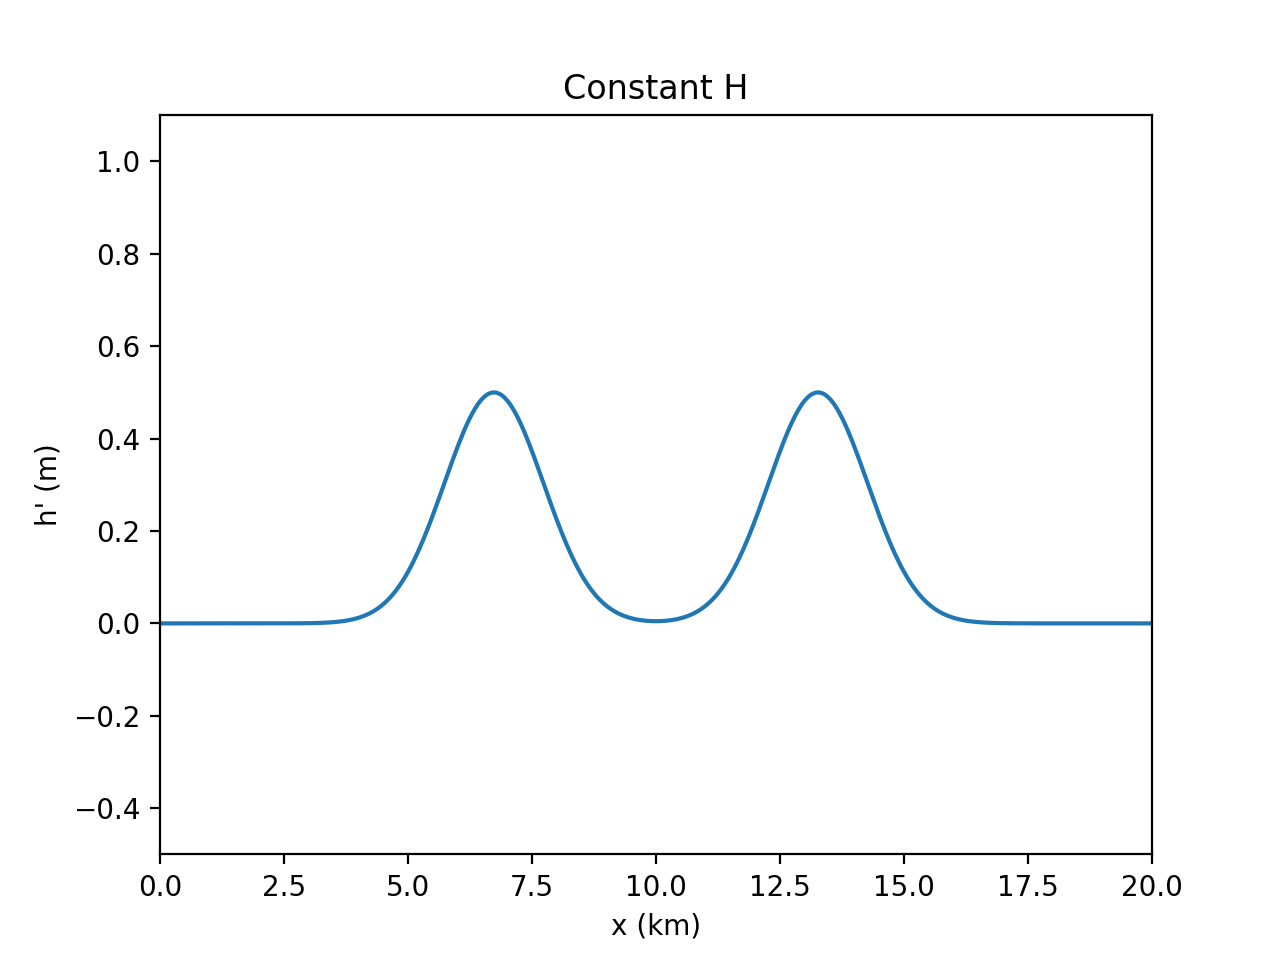

In [14]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_1[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

In this scenario, a constant H makes a fairly standard wave model. Equation $(9)$ becomes:

$$\frac{\partial^2}{\partial t^2}h^{\prime} - gH\frac{\partial^2 h^{\prime}}{\partial x^2} = 0 \tag{13}$$

Both peaks move at the same rate and appear identical, which is expected of the model. No instability is present, and the boundary conditions seem to work correctly.

### 2. Constant Slope H

<IPython.core.display.Javascript object>


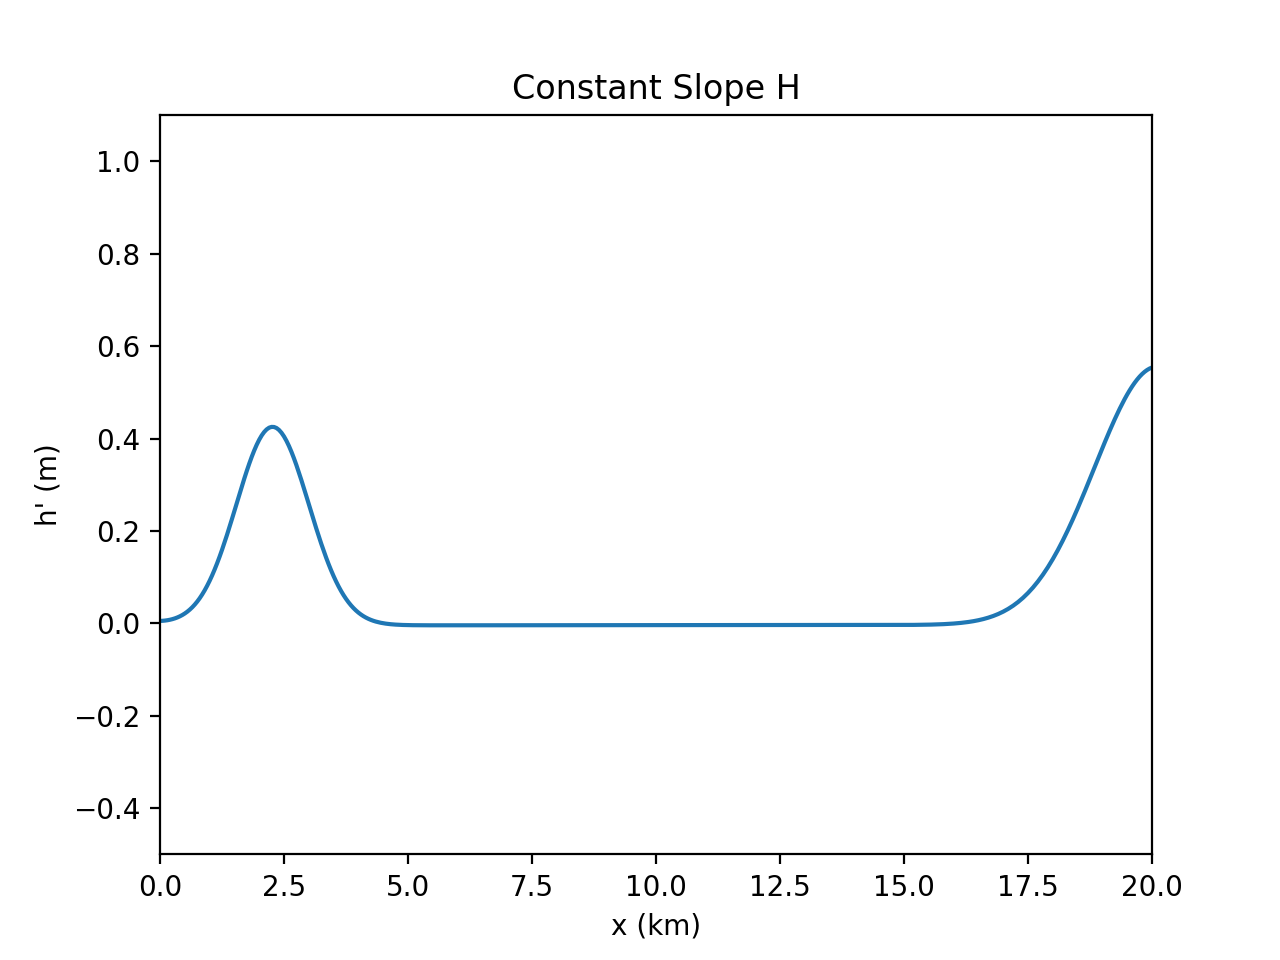

<IPython.core.display.Javascript object>


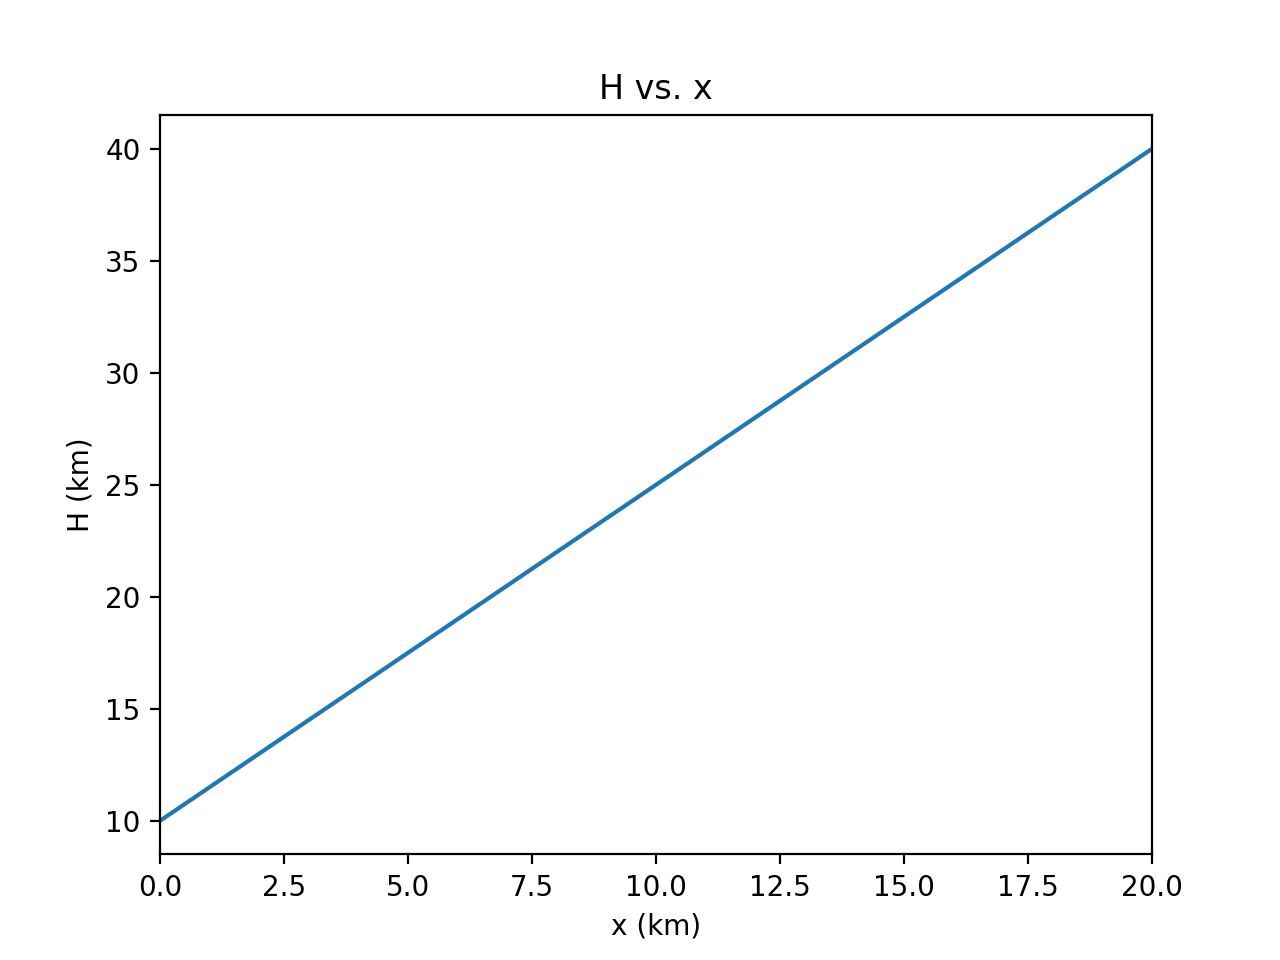

In [15]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant Slope H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_2[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.1)

#plot H
plt.figure(2)
plt.plot(x/1000, H_2/1000)
plt.title("H vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel("H (km)")
plt.show()

The model appears to be similar to the previous example. Equation $(13)$ applies to this scenario as well, as although $H$ is changing, it is changing at a constant rate. The main difference is that the wave speed, $c = \sqrt{gH}$, changes at each point for this model as well. With increasing $H$, the speed of the wave should increase as well. This is apparent in the animated plot for the model, as the right wave appears to approach the boundary at a quicker rate than the left wave. 

Curiously, the wave amplitude becomes smaller as $H$ decreases. At first glance, this appears to contradict observations of waves approaching shores, where wave amplitude increases. However, observations of increasing amplitudes near shore occur where $H$ is small enough to cause friction between waves and the bottom of the ocean (Earle, 2015). Not only does this current model only apply only when $H \gg |h'|$, the model scope does not include near-shore waves. An examination of $M_1$ in equation $(11)$ may reveal the reason amplitude decreases as $H$ decreases. $\lambda$ is plotted below for each grid point:

<IPython.core.display.Javascript object>


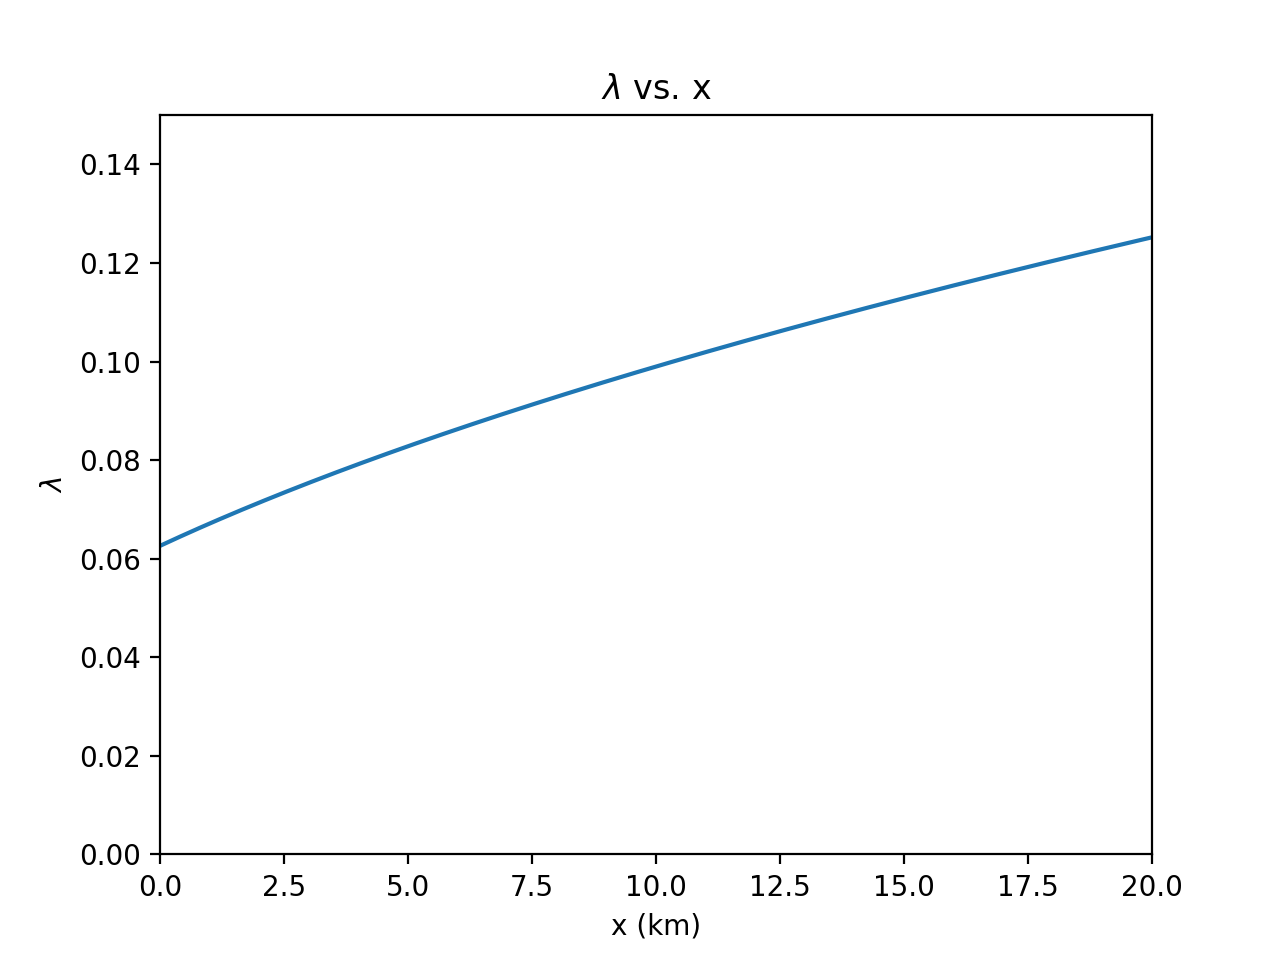

In [16]:
#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_2)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylim(0, 0.15)
plt.ylabel(r"$\lambda$")
plt.show()

As expected, $\lambda$ increases with $H$ as the modeled space proceeds from lower $x$ to higher $x$. Thus, in $M_1$, $\lambda_1 < \lambda_2 < ... < \lambda_i$ where $i$ is the matrix row number. It is evident that for any wave, moving to lower $x$ (and lower $H$ and $\lambda$) will gradually decrease $h'$ and vice versa.

Notably, though $\lambda$ increases at higher $x$ values in the model, no instability appears in this model.

### 3. Discontinuous H

<IPython.core.display.Javascript object>


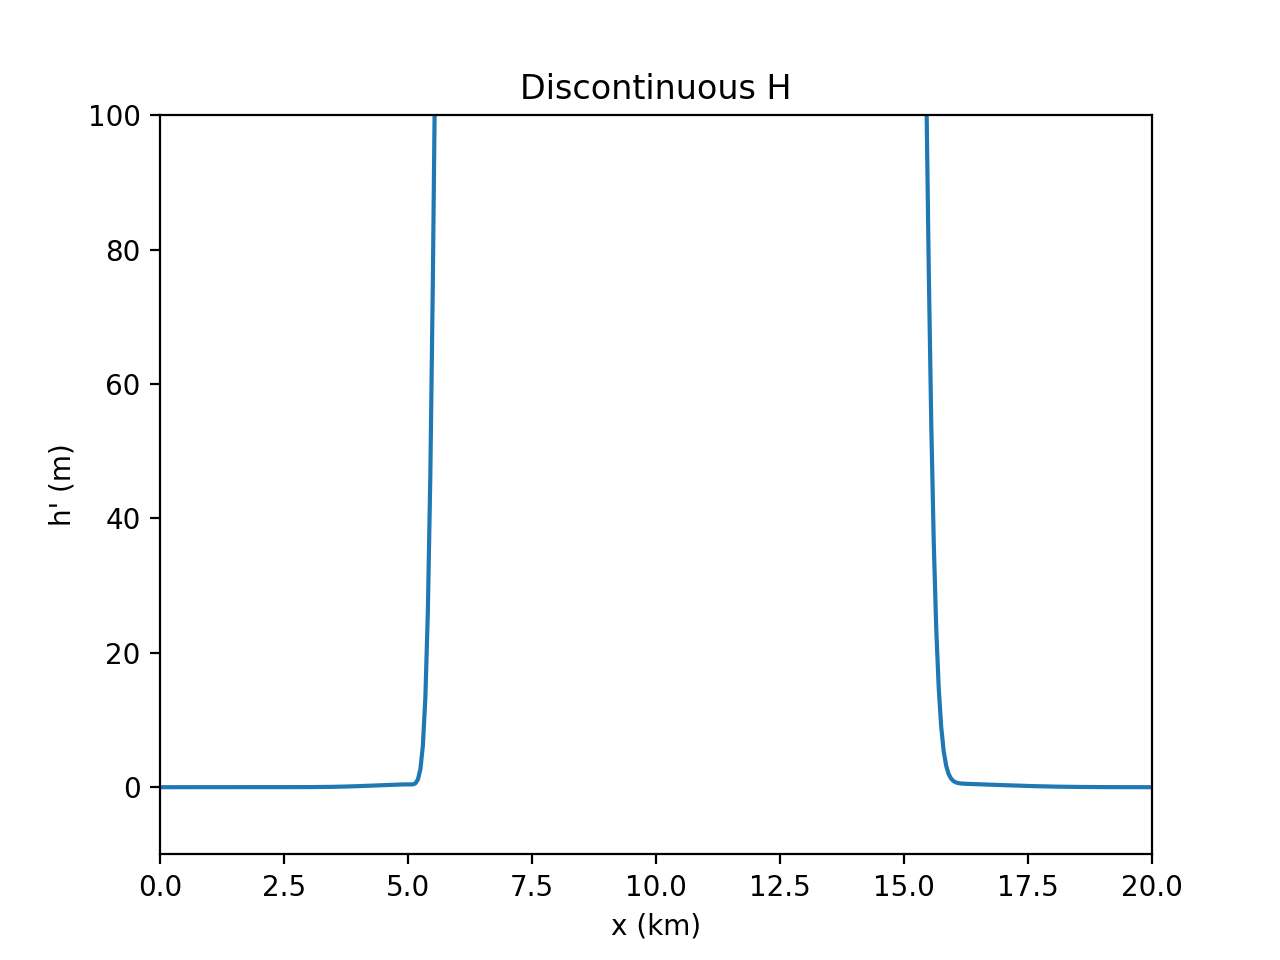

<IPython.core.display.Javascript object>


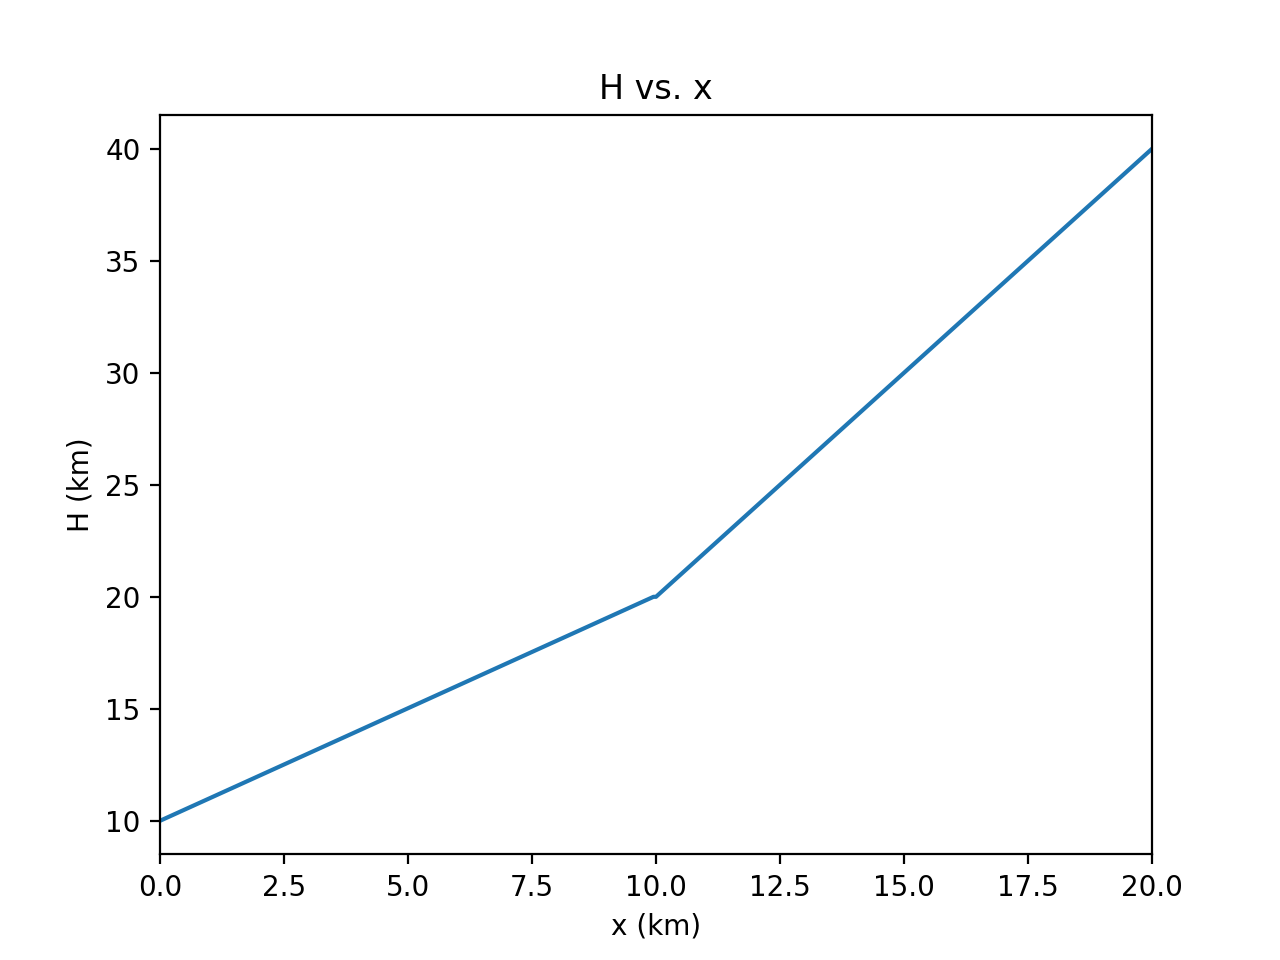

In [18]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Discontinuous H")
ax.set_xlim(0, 20)
ax.set_ylim(-10, 100)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    line.set_data((x/1000, h_3[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)

#plot H
plt.figure(2)
plt.plot(x/1000, H_3/1000)
plt.title("H vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel("H (km)")
plt.show()

As is immediately obvious, this scenario does not run as neatly as the previous two. Instability is present within the first time step, with a large fissure-like "break" in the middle of the modeled wave height that propogates throughout the model as it proceeds. To investigate the source of the instability, $\lambda$ for this scenario is plotted below:

<IPython.core.display.Javascript object>


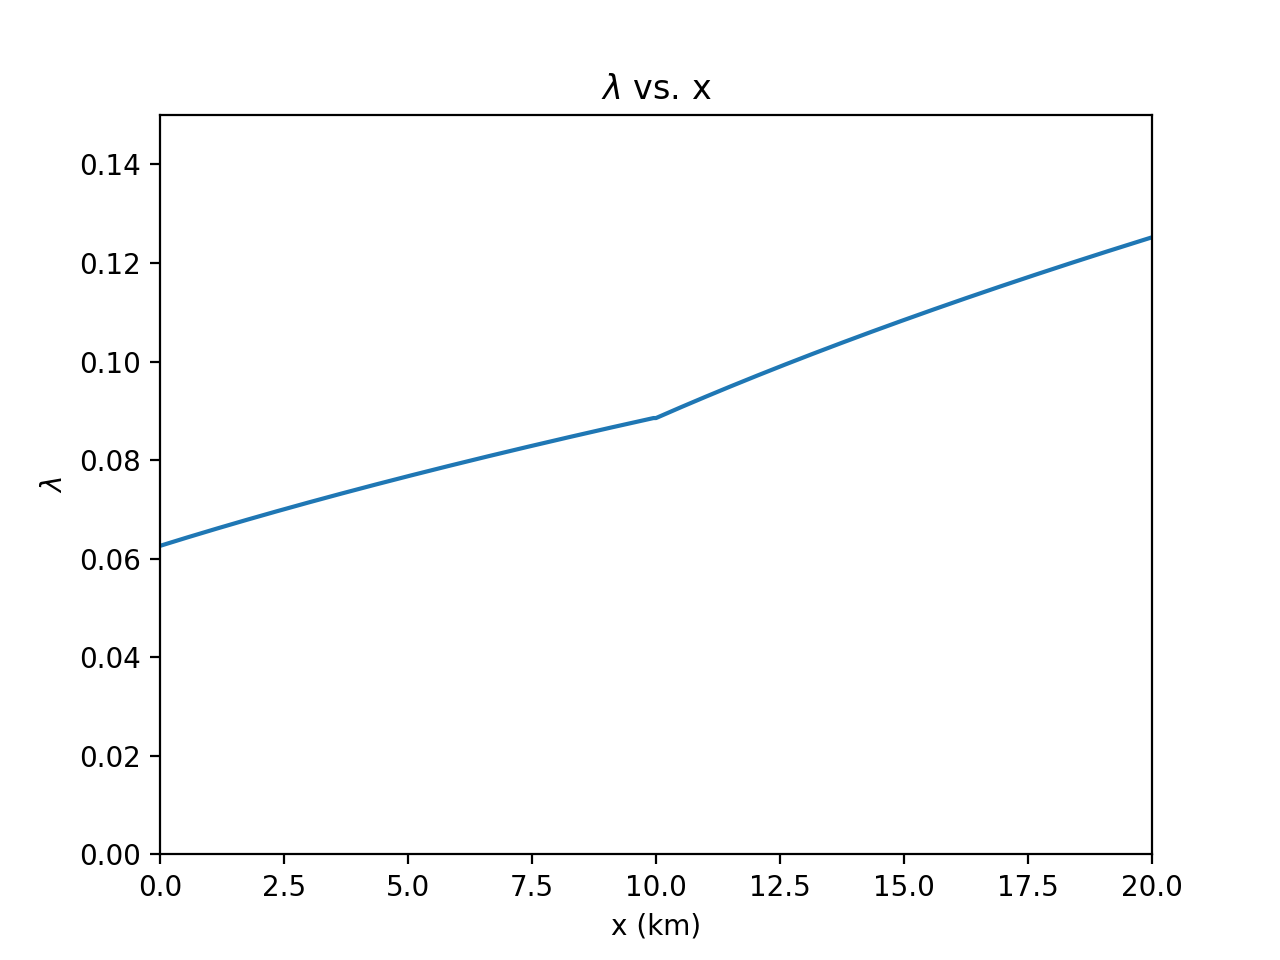

In [19]:
#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_3)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylim(0, 0.15)
plt.ylabel(r"$\lambda$")
plt.show()

The range of $\lambda$ values present in this scenario are not much different than those of the previous scenario, indicating that the values of $\lambda$ themselves are not causing the instability. Instead, the discontinuity of the bottom slope in both $H$ and $\lambda$, which appears in the middle of the modeled space at $x = 10\,\text{km}$, seems to be the cause of the instability. To test this, a scenario where $\frac{\partial^2 H}{\partial x^2} \neq 0$ along all of the model space was devised.

### 4. Non-linear H

<IPython.core.display.Javascript object>


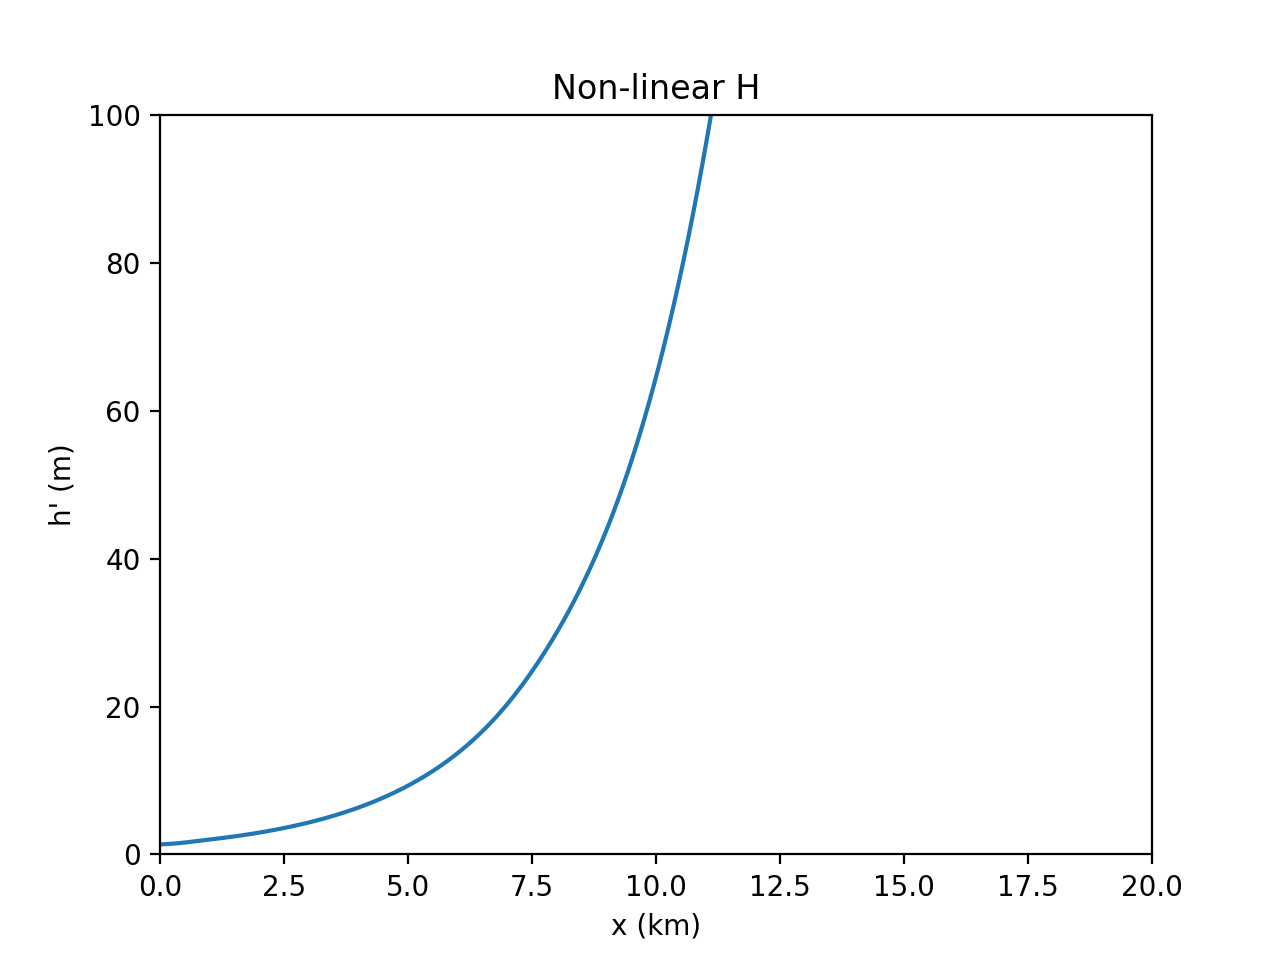

<IPython.core.display.Javascript object>


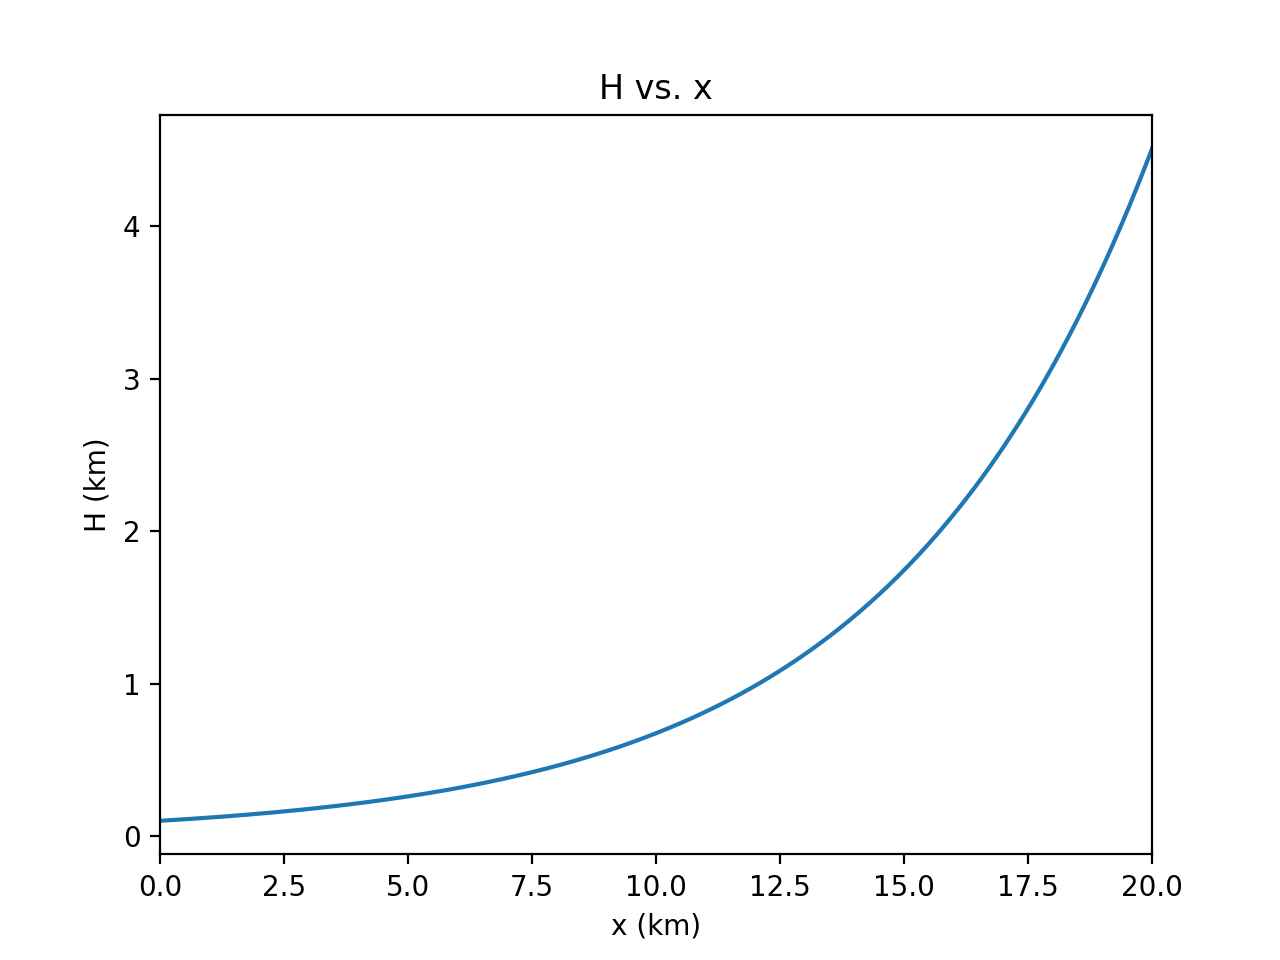

In [20]:
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Non-linear H")
ax.set_xlim(0, 20)
ax.set_ylim(0, 100)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_4[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

#plot H
plt.figure(2)
plt.plot(x/1000, H_4/1000)
plt.title("H vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel("H (km)")
plt.show()

From modeling a scenario where $\frac{\partial^2 H}{\partial x^2} \neq 0$, it is evident that the varying of the rate at which the slope changes is causing the instability in the model. To investigate the role of $\lambda$ once again in this scenario, it is plotted below:

<IPython.core.display.Javascript object>


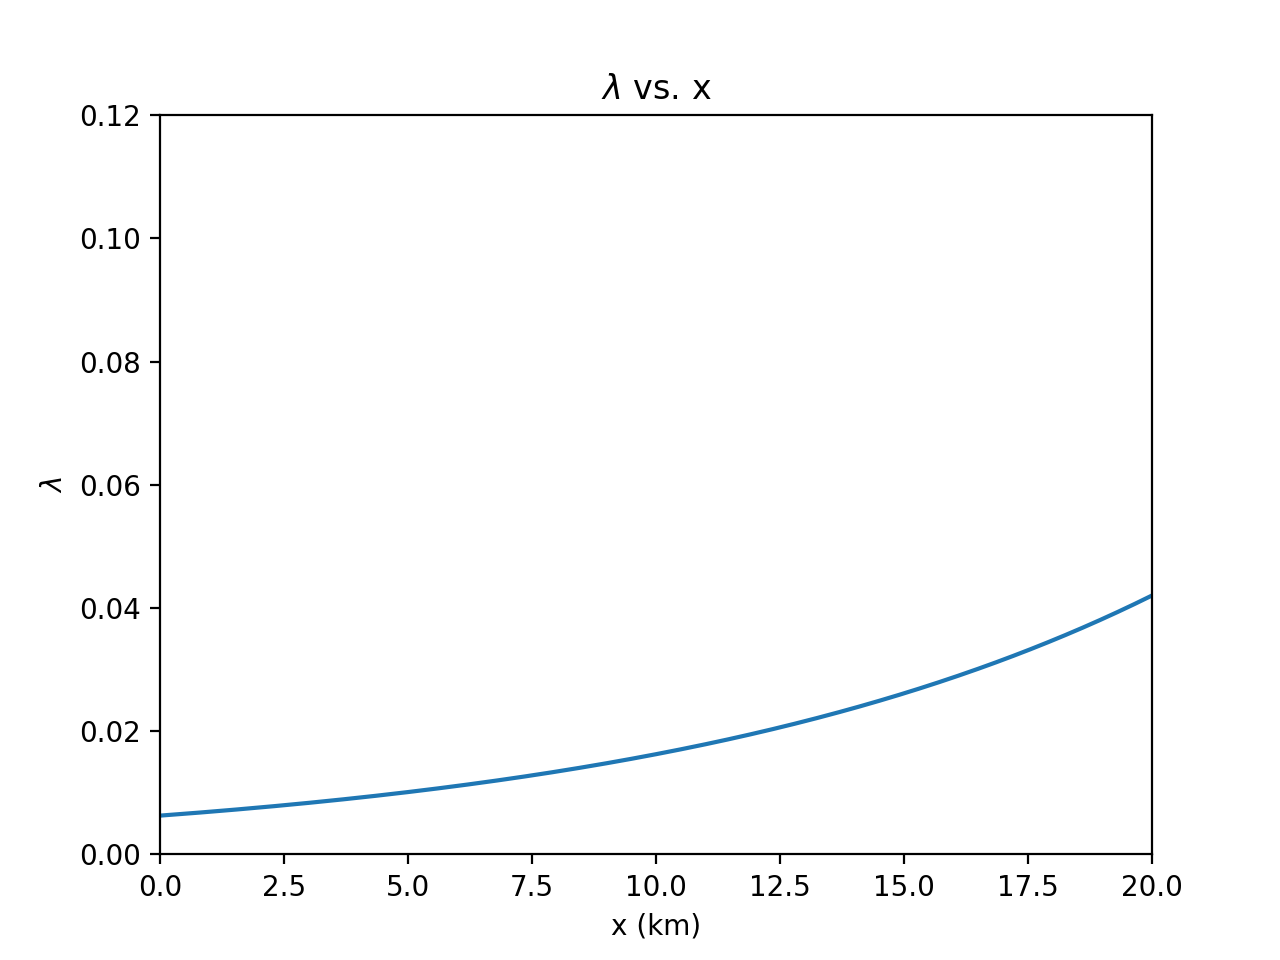

In [21]:
#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_4)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylim(0, 0.12)
plt.ylabel(r"$\lambda$")
plt.show()

Instability is unlikely to be caused by the $\lambda$ values, as they are an order of magnitude below those found in the previous scenarios. Though low $\lambda$ values have previously been uninvestigated in this report, parallels between $\lambda$ and the Courant number suggests that instability generated by this dimensionless variable should only increase when the variable increases (Slingerland and Kump, 2011). Additionally, the instability seen in the model is generated on the side of the model with higher $H$ and $\lambda$, which suggests that lower $\lambda$ values cannot be the cause of the instability.

Thus, the most reasonable explanation is that the variation of $H$ itself is the cause of the problem. Below, this scenario is repeated with no initial wave ($h'(x, t_1) = 0$ and $h'(x, t_2) = 0$):

<IPython.core.display.Javascript object>


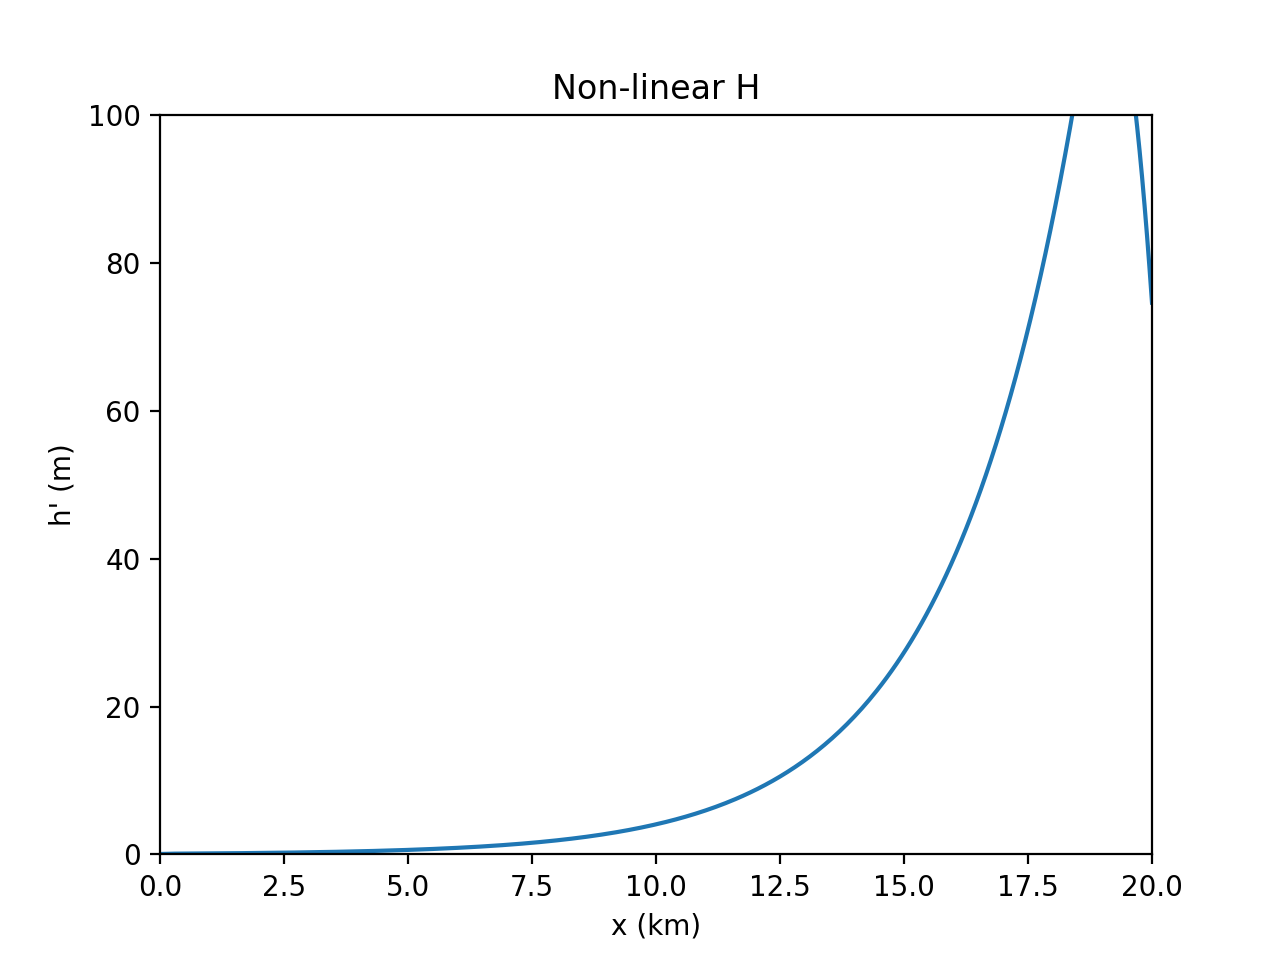

In [22]:
#inital conditions
h_4 = np.zeros((nx,nt))
h_4[:,0] = np.zeros((nx))
h_4[:,1] = np.zeros((nx))

#run
for k in np.arange(1,nt - 1): 
    h_4[:,k+1] = M1@h_4[:, k] + M2@H_4 - np.concatenate((h_4[0:-1, k-1], np.array([0])))

    #animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Non-linear H")
ax.set_xlim(0, 20)
ax.set_ylim(0, 100)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_4[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000, interval=0.5)
plt.show()

The same instability appears. An investigation into equation $(6)$ explains the phenomenon. When $h' = 0$, $(6)$ becomes the following:

$$\frac{\partial^2 h^{\prime}}{\partial t^2} - gH\frac{\partial^2 H}{\partial x^2} = 0 \tag{14}$$

$H\frac{\partial^2 H}{\partial x^2}$ increases with $x$. Thus, a change in wave height is generated by the right term of the function despite the lack of a starting wave. When an initial wave is deployed or when a wave is generated by the $H$ terms in $(13)$, the function keeps propagating this artificial wave, leading to the perpetual increase of the wave height.

One inconsistency with this explanation is the presence of a wave-like curve that appears in the model despite the slope of $H(x)$ consistently increasing. The cause of this may be the enforcement of the assumption that $\frac{\partial^2 H}{\partial x^2} = 0$ at the boundary, which causes the boundary wave height to be consistently lower than the other wave heights at almost every time step. While the assumption functions well when $\frac{\partial^2 H}{\partial x^2} = 0$ for all $x$, if the model were to be implemented for $\frac{\partial^2 H}{\partial x^2} \neq 0$, as is the case for many ocean bottoms, this would bias the model near the boundaries. One solution to this problem is to set up $H(x)$ to exist at grid points immediately outside the boundary points. In other words, $M_2$ would be modeled with the form seen in $(9)$ rather than $(12)$, and the new general marching equation would be as follows: 

\begin{gather}
 \begin{bmatrix}
 h^{k+1}_1 \\
 h^{k+1}_2 \\
 \vdots \\
 h^{k+1}_m \\
 \end{bmatrix}
 =
 M_1
 \begin{bmatrix}
 h^k_1 \\
 h^k_2 \\
 \vdots \\
 h^k_m \\
 \end{bmatrix}
 +
 M_2
 \begin{bmatrix}
 H_1 \\
 H_2 \\
 \vdots \\
 H_m\\
 \end{bmatrix}
 +
 \begin{bmatrix}
 \lambda^2 H_0\\
 0 \\
 \vdots \\
 0 \\
 \lambda^2 H_{m+1} \\
 \end{bmatrix}
 -
 \begin{bmatrix}
 h^{k-1}_1 \\
 h^{k-1}_2 \\
 \vdots \\
 h^{k-1}_{m-1} \\
 0\\
 \end{bmatrix}
 \tag{15}
\end{gather}

$$
M_1 \; \text{from} \; (12)\;
 \text{and} \; M_2 \; \text{from} \; (9)
$$

### Comparison with Real Data

While a discussion of model deviations from real observations was performed for scneario two, real comparisons with the other outcomes of the model are difficult. Typical wave model validation is completed using a mean bias between model predictions and measured data (Turner et al., 2016). As the equilibrium height data is not reflective of true beach morphologies it is difficult to assess model performance. Accessible data collected by offshore buoys is reported using significant wave height and peak wave period, which does not enable the determination of wave speed without wavelength. Additionally, some difficulty was experienced in obtaining wave speed from this model due to the splitting of the initial wave into two waves. 

Generally, it is valuable to know from derivations that wave speed decreases with decreasing equilibrium heights, but again, with no implementation of interactions between waves and ocean bottoms in this model, it is difficult to generalize the behavior of waves near shore. Additionally, without the availability of a model that adequately captures a nonzero second-order derivative of equilibrium height, much real data is inaccesible for comparison. Thus, no reasonable comparison of model results with existing data was performed for this report.

### Instability from $\lambda$
In all previous examples, instability was caused by an inherent piece of the model and not the model parameters. To explore the limits of the model, $\Delta t$ and $\Delta x$ will be varied for scenario 2 (constant slope $H$). $\lambda$ is re-expressed below for ease of reference:

$$\lambda = \frac{\sqrt{gH}\Delta t}{\Delta x} \tag{16}$$

Though there are parallels between $\lambda$ and the Courant number, while Courant numbers that are too low cause numerical diffusion in certain circumstances, low $\lambda$ does not appear to experience the same issue:

<IPython.core.display.Javascript object>


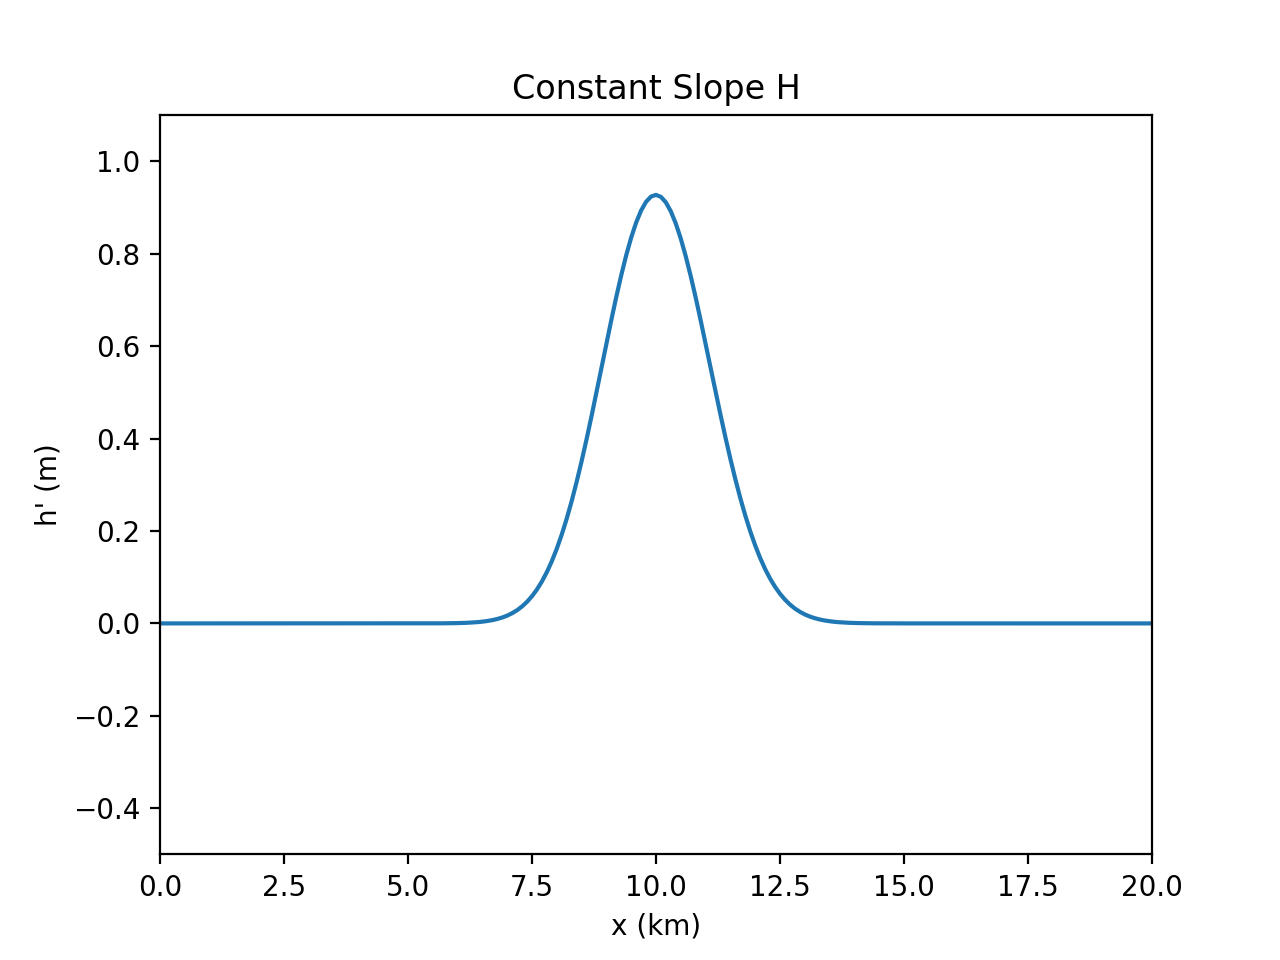

<IPython.core.display.Javascript object>


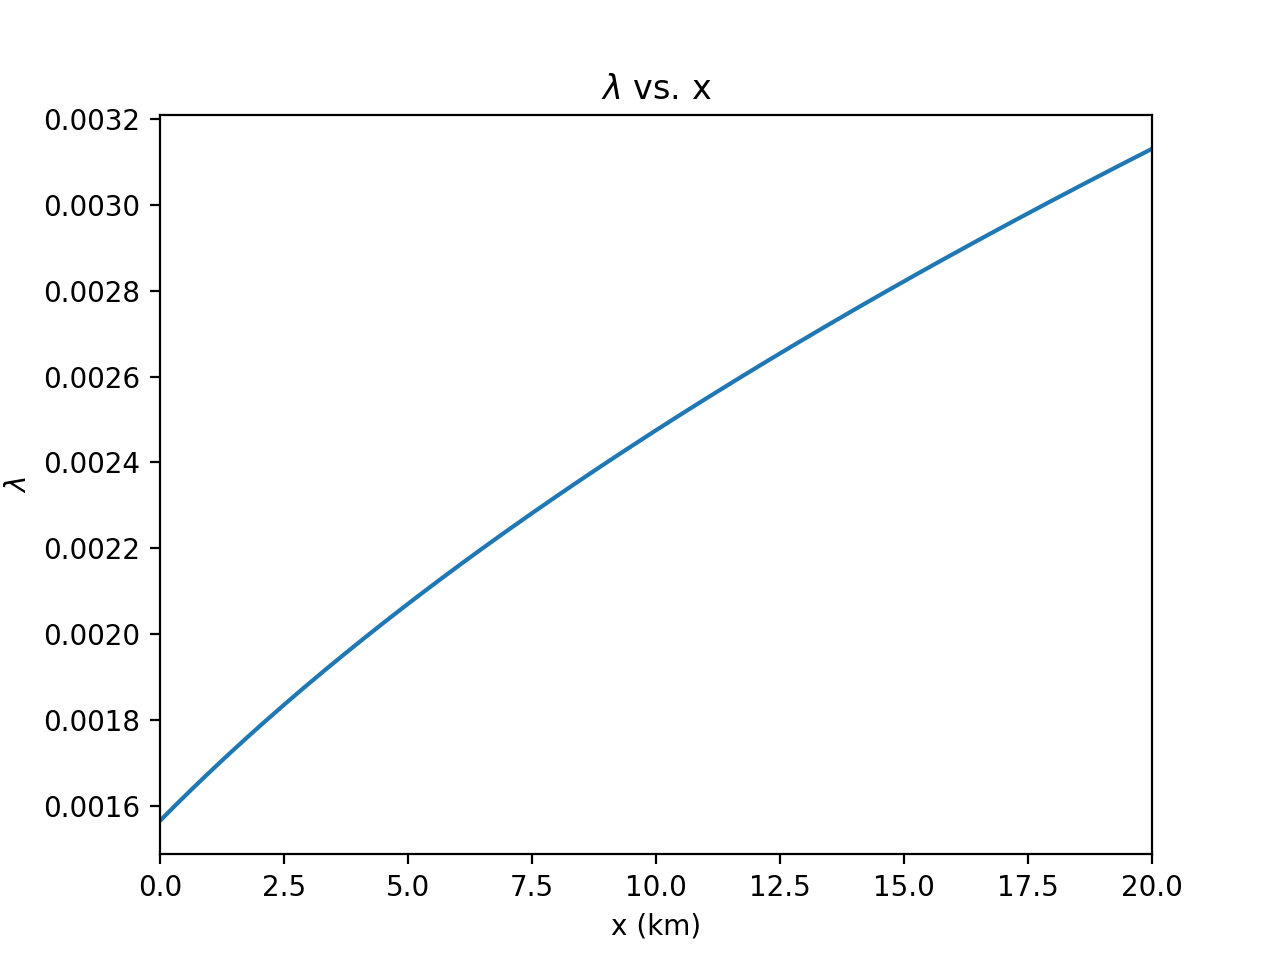

In [23]:
dt = 0.0005 #s
dx = 0.1   #km

#convert
dx = dx*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)
nx = len(x)
nt = len(t)

H_2 = np.linspace(10000,40000,nx) #m

#define lambda and lambda^2
lamb_2 = np.sqrt(g*H_2)*dt/dx
lamb2_2 = np.square(lamb_2) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_2[i]
M1[0, 0] = 2 - lamb2_2[0]
M1[nx - 1, nx - 2] = lamb_2[-1]
M1[nx - 1, nx - 1] = 1-lamb_2[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_2[i]

h_2 = np.zeros((nx,nt))
h_2[:,0] = np.exp(-(x/1000-10)**2 / 2) 
h_2[:,1] = np.exp(-(x/1000-10)**2 / 2) 

#run
for k in np.arange(1,nt - 1): 
    h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))
    
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant Slope H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_2[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000000, interval=0.001)

#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_2)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel(r"$\lambda$")
plt.show()

An incredibly low $\lambda$ caused by decreasing $\Delta t$ and increasing $\Delta x$ results in a model that works perfectly fine, albeit very slowly. 

Courant numbers above 1 generally cause instability. To evaluate if the parallel circumstance is accurate for $\lambda$, $\Delta x$ is set to 0.05 km and $\Delta t$ is set to 0.1 s such that $\lambda \approx 1$ for $H = 25\, \text{km}$.

<ipython-input-25-e6cffa4341cd>:45: RuntimeWarning: invalid value encountered in matmul
  h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))


<IPython.core.display.Javascript object>


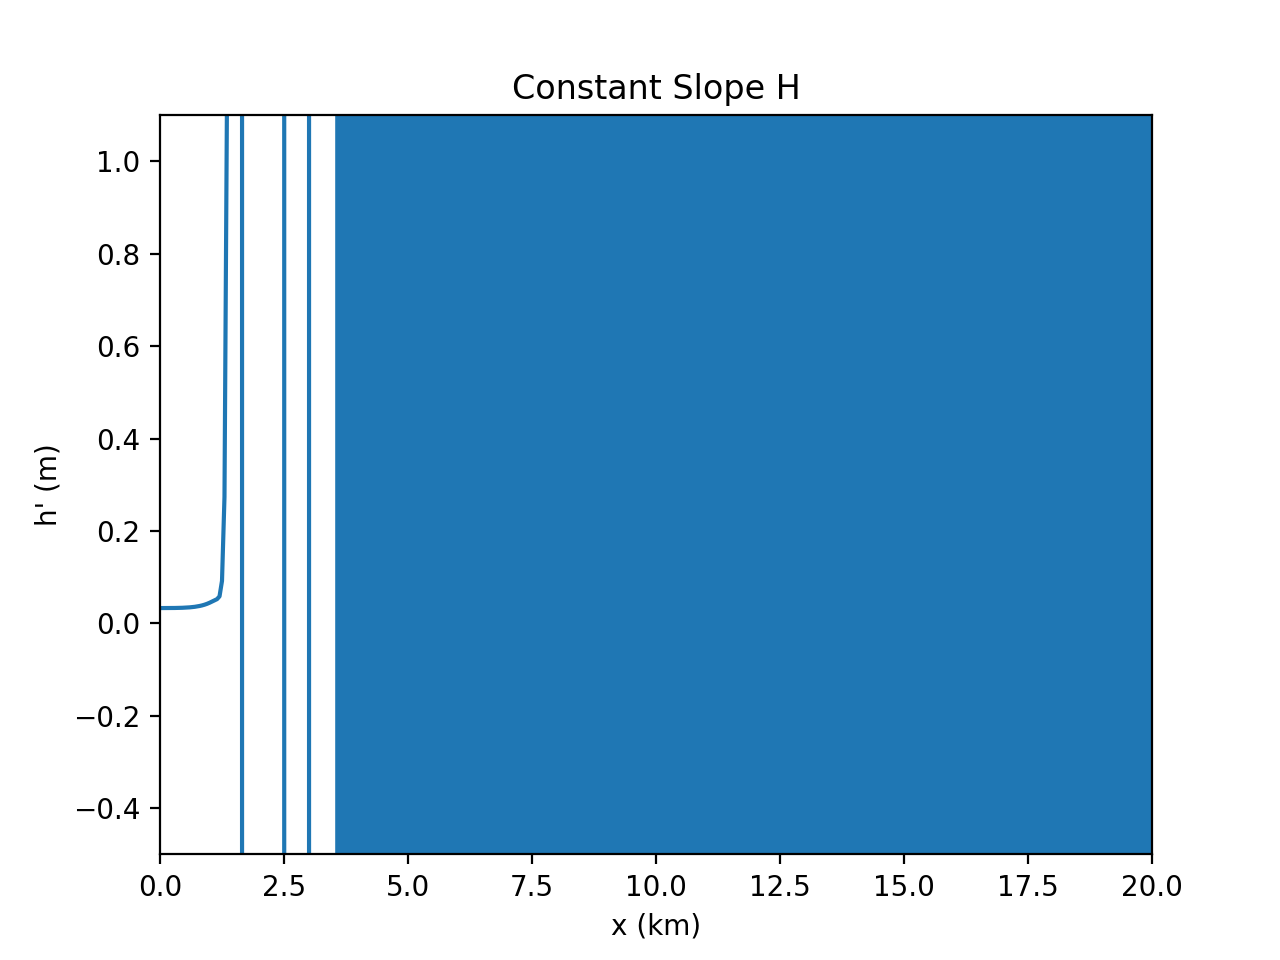

<IPython.core.display.Javascript object>


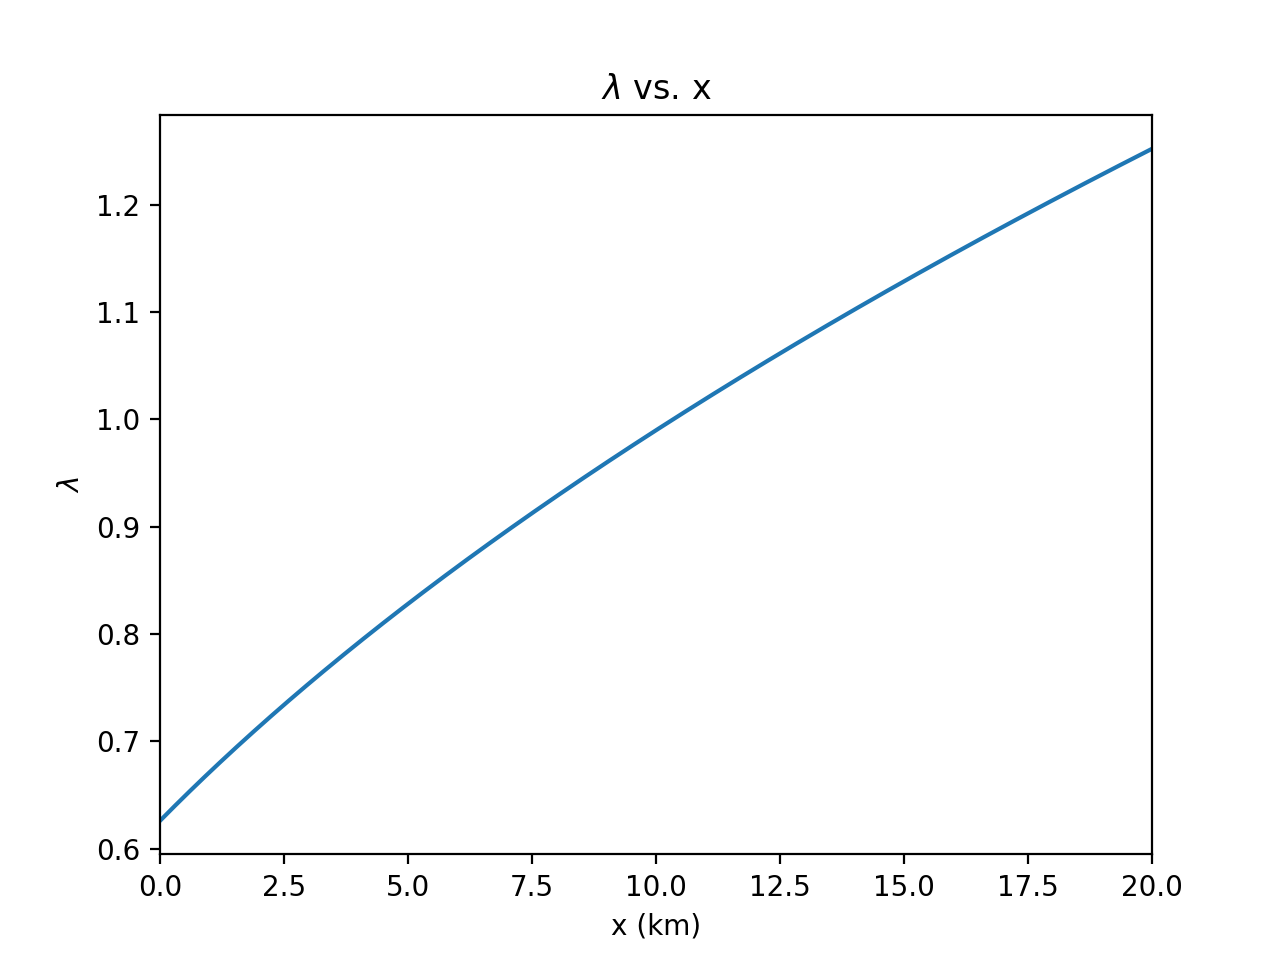

In [25]:
dt = 0.1 #s
dx = 0.05   #km

#convert
dx = dx*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)
nx = len(x)
nt = len(t)

H_2 = np.linspace(10000,40000,nx) #m

#define lambda and lambda^2
lamb_2 = np.sqrt(g*H_2)*dt/dx
lamb2_2 = np.square(lamb_2) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_2[i]
M1[0, 0] = 2 - lamb2_2[0]
M1[nx - 1, nx - 2] = lamb_2[-1]
M1[nx - 1, nx - 1] = 1-lamb_2[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_2[i]

h_2 = np.zeros((nx,nt))
h_2[:,0] = np.exp(-(x/1000-10)**2 / 2) 
h_2[:,1] = np.exp(-(x/1000-10)**2 / 2) 

#run
for k in np.arange(1,nt - 1): 
    h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))
    
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant Slope H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_2[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000000, interval=0.001)

#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_2)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel(r"$\lambda$")
plt.show()

The model does indeed experience instability for this scenario. A potentially important factor in this analysis is that before the numbers become too large to handle, the instability appears to begin on the left side of the function. From examining the plot of $\lambda$ against $x$, this appears to support the assertion that $\lambda > 1$ causes instability. To verify this once more, the following scenario is run such that $\lambda > 1$ for all $x$:

<IPython.core.display.Javascript object>


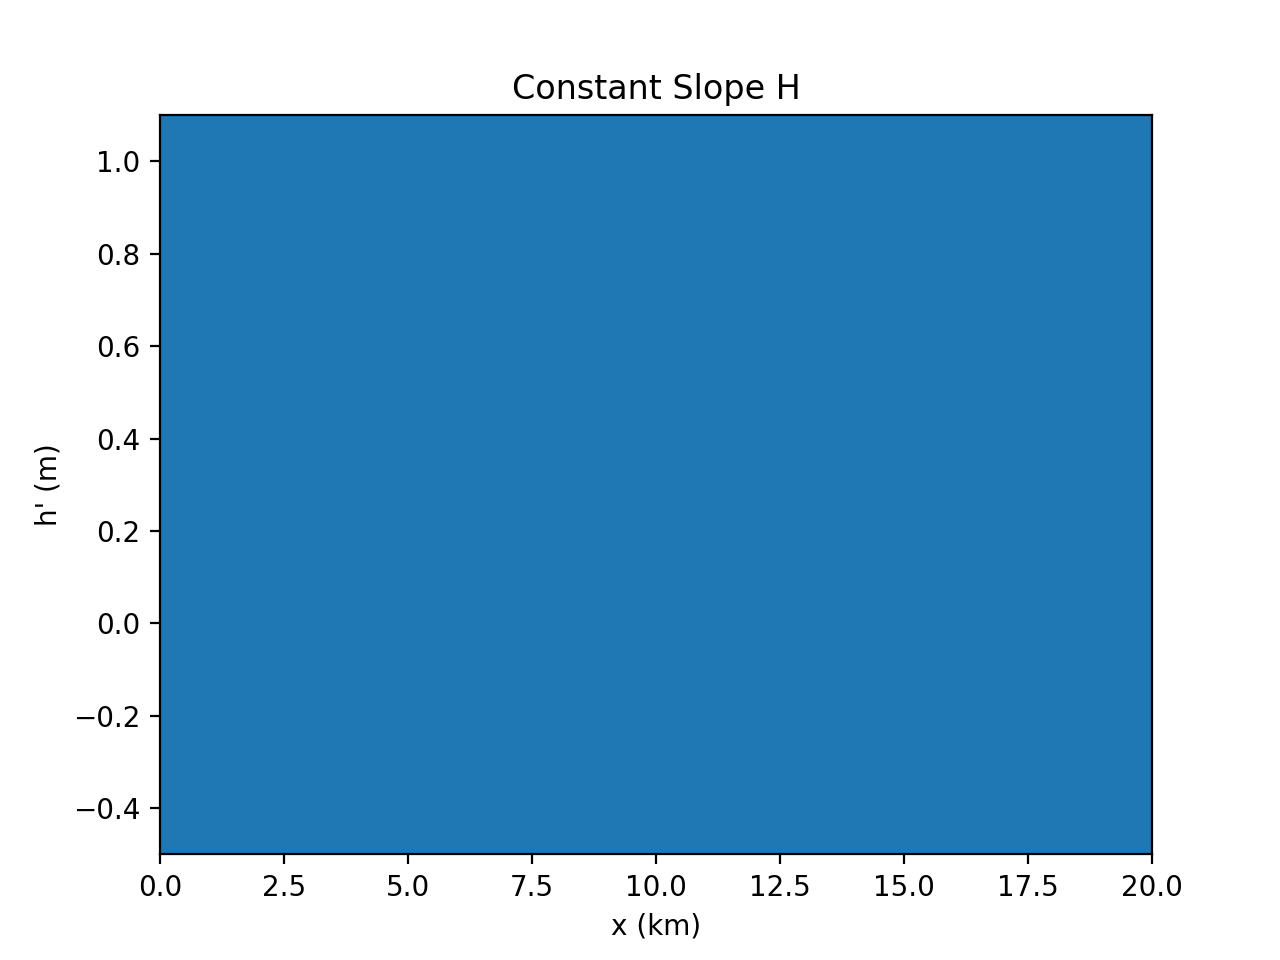

<IPython.core.display.Javascript object>


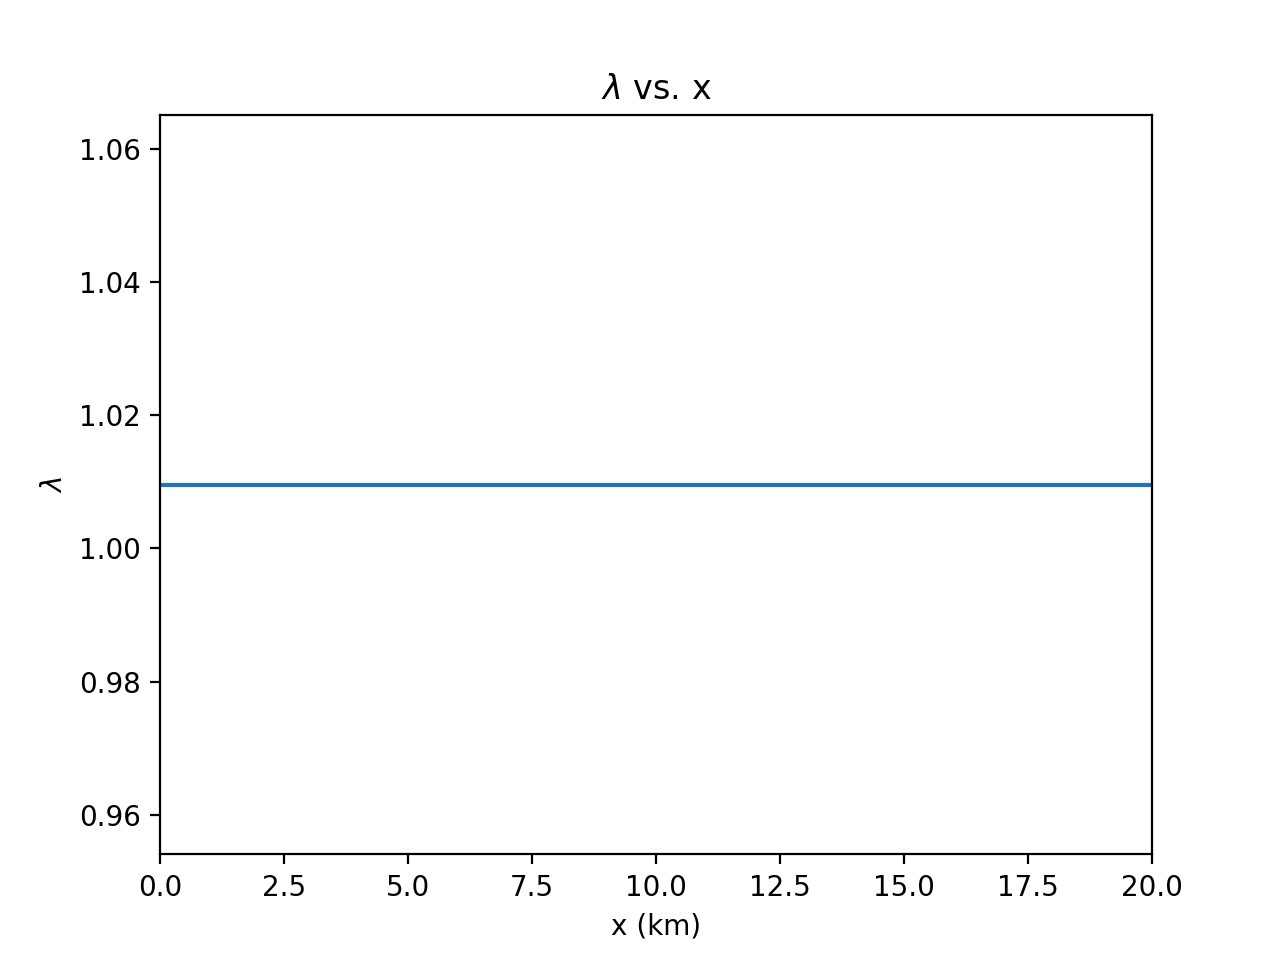

In [26]:
dt = 0.1 #s
dx = 0.05   #km

#convert
dx = dx*1000 #m

#initialize grids
x = np.arange(0,xf+dx,dx)
t = np.arange(0,tf+dt,dt)
nx = len(x)
nt = len(t)

H_2 = 26000*np.ones(nx)#np.linspace(10000,40000,nx) #m

#define lambda and lambda^2
lamb_2 = np.sqrt(g*H_2)*dt/dx
lamb2_2 = np.square(lamb_2) 

#create matrices
M1 = np.zeros((nx, nx))
for i in np.arange(0, nx):
    for j in np.arange(0, nx):
        if i == j:
            M1[i, j] = 2*(1 - lamb2_2[i])
        elif abs(i - j) == 1:
            M1[i, j] = lamb2_2[i]
M1[0, 0] = 2 - lamb2_2[0]
M1[nx - 1, nx - 2] = lamb_2[-1]
M1[nx - 1, nx - 1] = 1-lamb_2[-1]

M2 = np.zeros((nx, nx))
for i in np.arange(1, nx - 1):
    for j in np.arange(0, nx):
        if i == j:
            M2[i, j] = -2*lamb2_2[i]
        elif abs(i - j) == 1:
            M2[i, j] = lamb2_2[i]

h_2 = np.zeros((nx,nt))
h_2[:,0] = np.exp(-(x/1000-10)**2 / 2) 
h_2[:,1] = np.exp(-(x/1000-10)**2 / 2) 

#run
for k in np.arange(1,nt - 1): 
    h_2[:,k+1] = M1@h_2[:, k] + M2@H_2 - np.concatenate((h_2[0:-1, k-1], np.array([0])))
    
#animate
fig, ax = plt.subplots()

line, = ax.plot([])

ax.set_title("Constant Slope H")
ax.set_xlim(0, 20)
ax.set_ylim(-0.5, 1.1)
ax.set_xlabel("x (km)")
ax.set_ylabel("h\' (m)")

def animate(frame_num):
    
    line.set_data((x/1000, h_2[:, frame_num]))
    return line

anim = FuncAnimation(fig, animate, frames=10000000, interval=0.001)

#plot lambda
plt.figure(2)
plt.plot(x/1000, lamb_2)
plt.title(r"$\lambda$ vs. x")
plt.xlabel("x (km)")
plt.xlim(0, 20)
plt.ylabel(r"$\lambda$")
plt.show()

As predicted, instability appears in this scenario. 

An important consequence of having $\lambda$ as a function of a varying $H$ is that models may not have constant $\lambda$ values, so it is important to consider the "least stable gridpoint" when developing a numerical model with varying wave speed. Generally, decreasing $\Delta t$ and increasing $\Delta x$ appear to work well to reduce instability, as $H$ is a fixed parameter determined by the modeled system. However, decreasing $\Delta t$ rapidly increases computational power needed, and increasing $\Delta x$ decreases the resolution of the model, which are both undesirable.

## Conclusion

This model reveals that both wave speed and wave amplitude are dependent on equilibrium height, where increasing height increases speed as the gravitational force is greater. A significant weakness of this model was its limited range of functioning equilibrium height data. A different numerical method capable of producing reasonable results using piece-wise height functions (and height functions with nonzero second derivatives) should be implemented to enable wave height modeling for more realistic coastal morphologies. 

With changing equilibrium height, this model can experience instability at different grid steps as $\lambda$ is a function of wave speed, time step, and grid spacing. Thus, accurate high resolution results may require high computational power, limiting model application. Additionally, the current model does not perform well using equilibrium heights near zero, representing nearshore depth. However, the processes characterizing shoreline wave motion are not adequately described as shallow water gravity waves. So, to most accurately model waves at small equilibrium heights, other wave equations should be investigated as well. 

## References
Earle, S.: Physical geology, 2015.

Engquist, B. and Majda, A.: Absorbing boundary conditions for numerical simulation of waves, Proceedings of the National Academy of Sciences, 74, 1765-1766, 1977.

Holton, J. R.: Chapter 7 Atmospheric oscillations: Linear perturbation theory, in: International Geophysics, edited by: Holton, J. R., Academic Press, 182-227, https://doi.org/10.1016/S0074-6142(04)80041-X, 2004.

Short, A. D. and Hesp, P. A.: Wave, beach and dune interactions in southeastern Australia, Marine Geology, 48, 259-284, https://doi.org/10.1016/0025-3227(82)90100-1, 1982.

Slingerland, R. and Kump, L.: Mathematical Modeling of Earth's Dynamical Systems : A Primer, Princeton University Press, Princeton, UNITED STATES2011.

Turner, I. L., Harley, M. D., Short, A. D., Simmons, J. A., Bracs, M. A., Phillips, M. S., and Splinter, K. D.: A multi-decade dataset of monthly beach profile surveys and inshore wave forcing at Narrabeen, Australia, Scientific Data, 3, 160024, 10.1038/sdata.2016.24, 2016.

Warner, J. C., Armstrong, B., He, R., and Zambon, J. B.: Development of a Coupled Ocean–Atmosphere–Wave–Sediment Transport (COAWST) Modeling System, Ocean Modelling, 35, 230-244, https://doi.org/10.1016/j.ocemod.2010.07.010, 2010.